In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns


### Generamos ruido blanco, que es

In [2]:
def generar_ruido_blanco(tamano):
    """Genera una serie de tiempo de ruido blanco."""
    return np.random.normal(loc=0, scale=1, size=tamano)


In [3]:
from scipy.stats import norm
def generarRuidoBlancoPPf(tamano):
    return norm.ppf(np.random.rand(tamano))

In [4]:
def graficar_serie(serie, titulo):
    """Grafica una serie de tiempo."""
    plt.figure(figsize=(10, 5))
    plt.plot(serie, color='blue')
    plt.title(titulo)
    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.grid()
    plt.show()


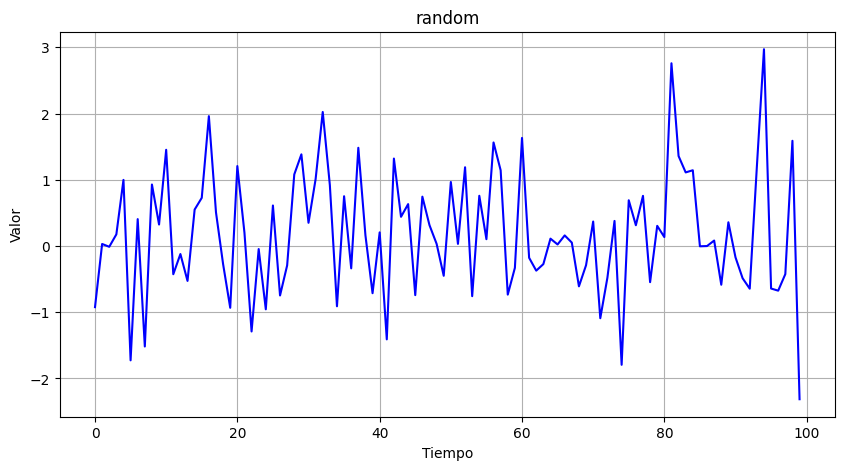

In [5]:
graficar_serie(generar_ruido_blanco(100),'random')

### Aca vemos como si se genera con ppf o con random da lo mismo, RUIDO BLANCO

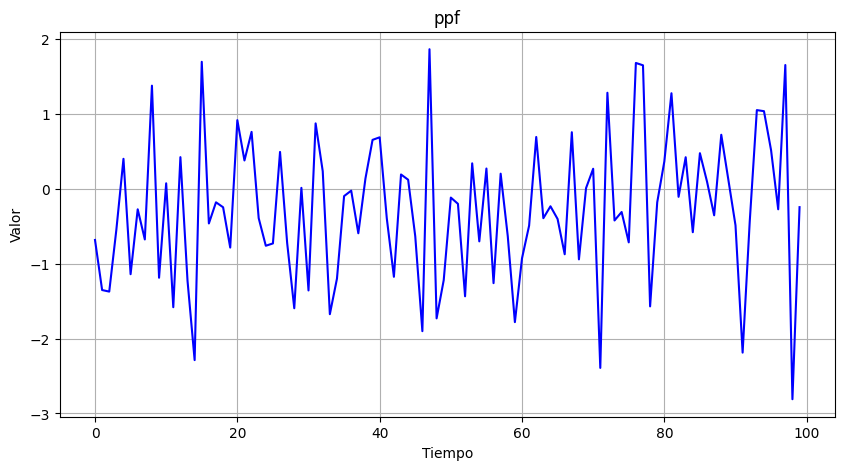

In [6]:
graficar_serie(generarRuidoBlancoPPf(100),'ppf')

## Armamos el df con estos datos

In [7]:
df=pd.DataFrame(generarRuidoBlancoPPf(100),columns=['ruido_blanco'])

### Ahora generamos un proceso AR(1) con un rho=0,5

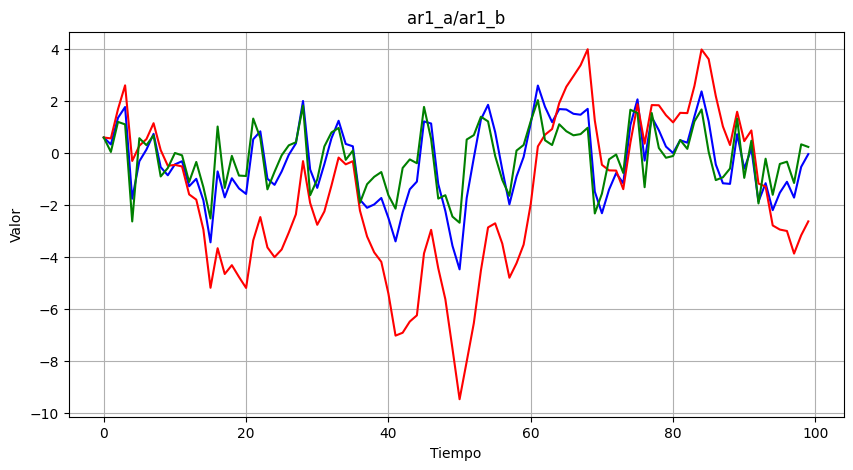

In [8]:
import warnings
warnings.filterwarnings("ignore")
from scipy.signal import lfilter

df=pd.DataFrame(generarRuidoBlancoPPf(100),columns=['ruido_blanco'])
rho_1=0.5
rho_2=0.9
df['ar1_a']=lfilter([1],[1,-rho_1],df['ruido_blanco'])
df['ar1_b']=lfilter([1],[1,-rho_2],df['ruido_blanco'])


plt.figure(figsize=(10, 5))
plt.plot(df['ar1_a'], color='blue')
plt.plot(df['ar1_b'], color='red')
plt.plot(df['ruido_blanco'],color='green')
plt.title('ar1_a/ar1_b')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.grid()
plt.show()



### Se puede ver que si se corre el script varias veces los valores terminan estando en torno al 0, es decir retornan a la media

### Corremos una regresion por minimos cuadrados contra yt e yt-1. Recordamos que cuanto mas alto el rho se suaviza mas el gráfico, menos dentado, como que tiene mas ciclos

In [9]:

y=df['ar1_a']
y_1=df['ar1_a'].shift(1)

data=pd.DataFrame({'y':y,'y_1':y_1}).dropna()
reg_y_ar1_a=sm.OLS(data['y'],data['y_1']).fit()


print(reg_y_ar1_a.summary())



                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.443
Model:                            OLS   Adj. R-squared (uncentered):              0.437
Method:                 Least Squares   F-statistic:                              77.91
Date:                Fri, 22 Aug 2025   Prob (F-statistic):                    4.24e-14
Time:                        13:14:26   Log-Likelihood:                         -151.52
No. Observations:                  99   AIC:                                      305.0
Df Residuals:                      98   BIC:                                      307.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [10]:

y=df['ar1_b']
y_1=df['ar1_b'].shift(1)

data=pd.DataFrame({'y':y,'y_1':y_1}).dropna()
reg_y_ar1_a=sm.OLS(data['y'],data['y_1']).fit()


print(reg_y_ar1_a.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              762.9
Date:                Fri, 22 Aug 2025   Prob (F-statistic):                    4.87e-48
Time:                        13:14:26   Log-Likelihood:                         -153.05
No. Observations:                  99   AIC:                                      308.1
Df Residuals:                      98   BIC:                                      310.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [11]:
from scipy.stats import kurtosis
# En la regresión lineal la kurtosis es sobre los residuos
#No coinciden los valores porque las implementaciones son diferentes
kurtosis=kurtosis(reg_y_ar1_a.resid,fisher=False)
print(f"Curtosis {kurtosis}")

from statsmodels.stats.stattools import jarque_bera
jb_test=jarque_bera(reg_y_ar1_a.resid)
print(f"Kurtosis: {jb_test[3]}")

Curtosis 2.3749873795162846
Kurtosis: 2.3749873795162846


### 8. Graficos de correlograma

In [12]:
def plot_acf_pacf(series, lags=40):
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    sm.graphics.tsa.plot_acf(series, lags=lags, ax=axes[0])
    sm.graphics.tsa.plot_pacf(series, lags=lags, ax=axes[1])
    plt.show()


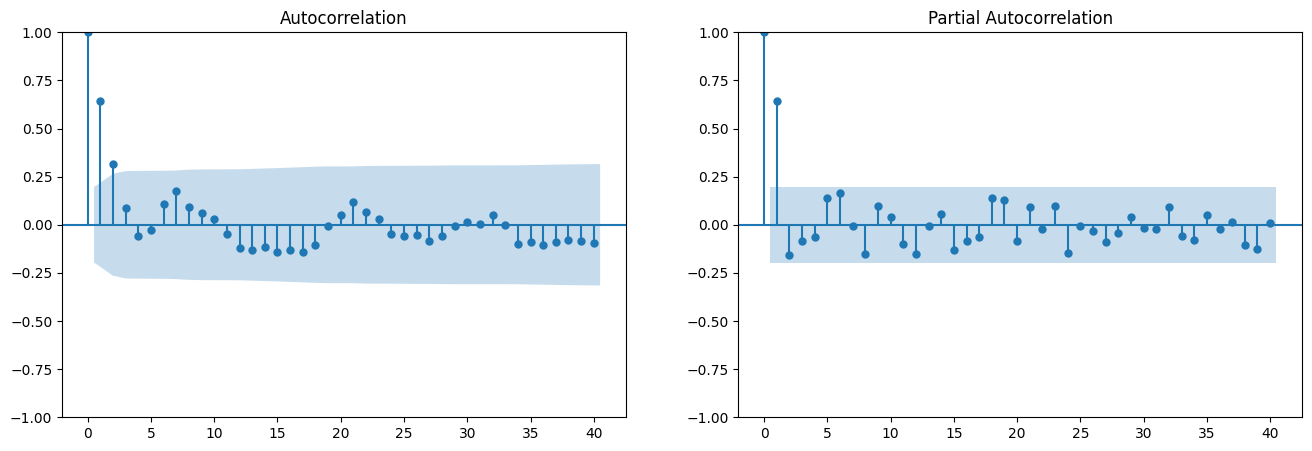

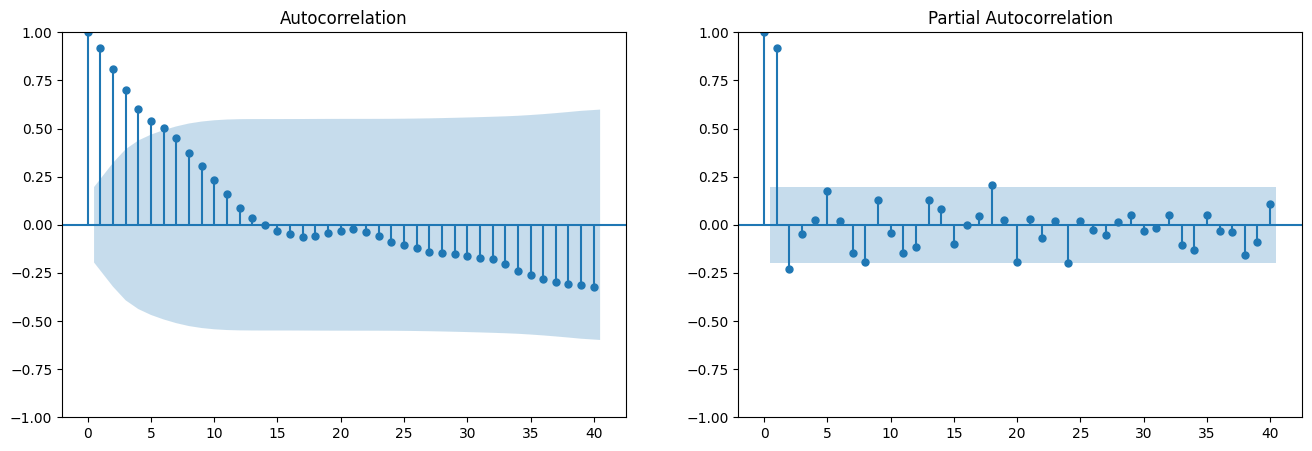

In [13]:
plot_acf_pacf(df['ar1_a'])
plot_acf_pacf(df['ar1_b'])



### Correlogramas de este tipo son de series estacionarias. En el primer rezago la autocorrelacion es perfecta porque todo rezago esta 100% correlaccionado con si mismo.

### 9 Aplicamos un shock agregando a ruido_blanco, ar_a  ar_b un 3 en la columna 15

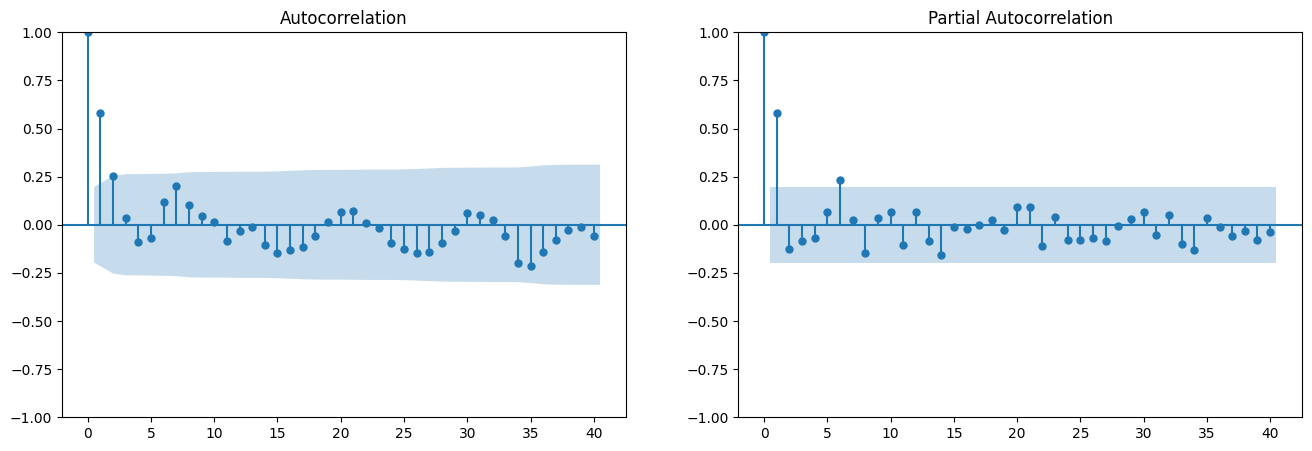

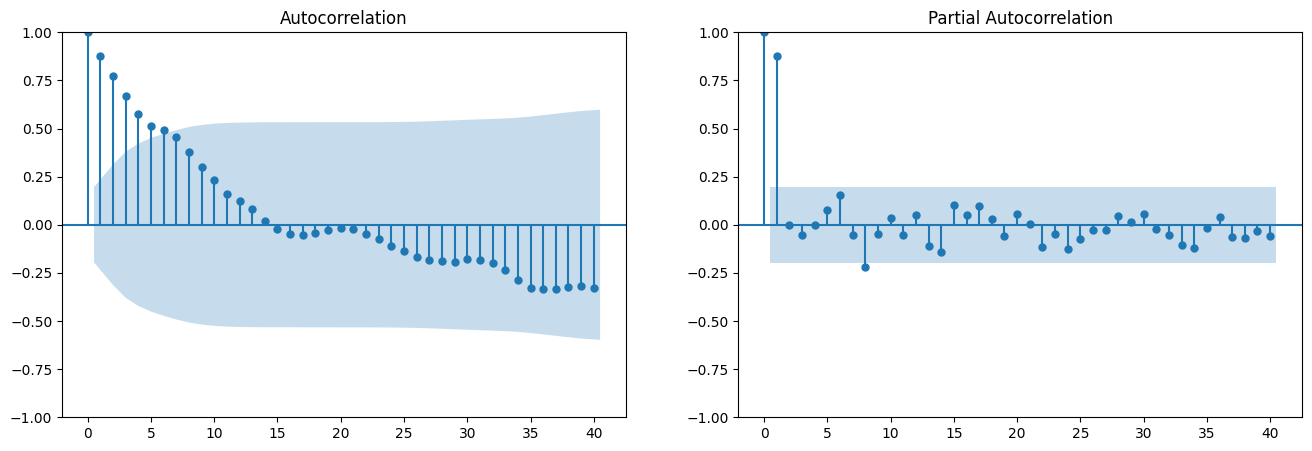

In [14]:

df_shock=df.copy()
df_shock['ruido_blanco'][15]=3
df_shock['ar1_a'][15]=3
df_shock['ar1_b'][15]=3

df_shock.head(20)

plot_acf_pacf(df_shock['ar1_a'])
plot_acf_pacf(df_shock['ar1_b'])

### Repetimos el grafico del punto 4 a ver si retornan a la media y si alguno lo hace mas rápido

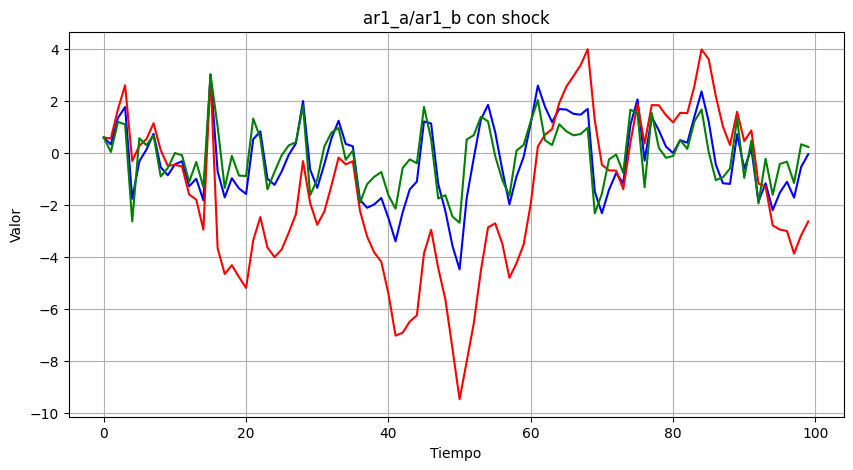

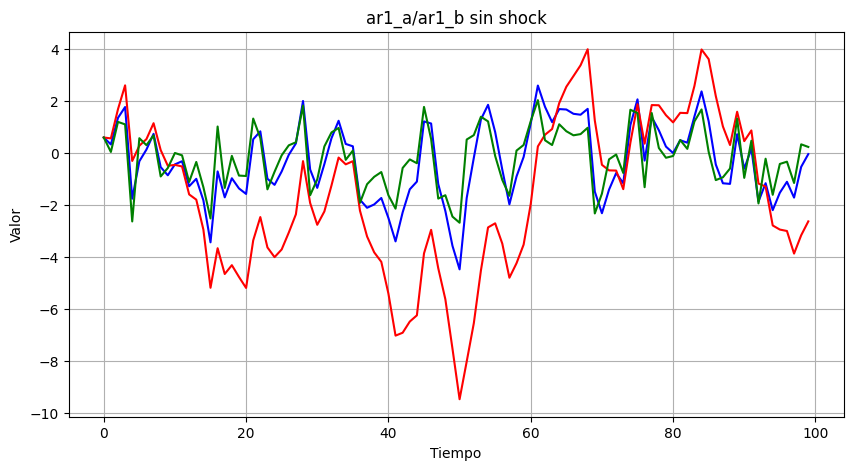

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(df_shock['ar1_a'], color='blue')
plt.plot(df_shock['ar1_b'], color='red')
plt.plot(df_shock['ruido_blanco'],color='green')
plt.title('ar1_a/ar1_b con shock')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.grid()
plt.show()



plt.figure(figsize=(10, 5))
plt.plot(df['ar1_a'], color='blue')
plt.plot(df['ar1_b'], color='red')
plt.plot(df['ruido_blanco'],color='green')
plt.title('ar1_a/ar1_b sin shock')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.grid()
plt.show()


### 10 Sin el shock anterior, o sea, usando el df original generamos un modelo autoregresivo pero con rho_1=1 en lugar de 0,5.
### Observamos que claramente se vuelve NO estacionario

In [28]:
rho_3=1
df['ar1_c']=lfilter([1],[1,-rho_3],df['ruido_blanco'])


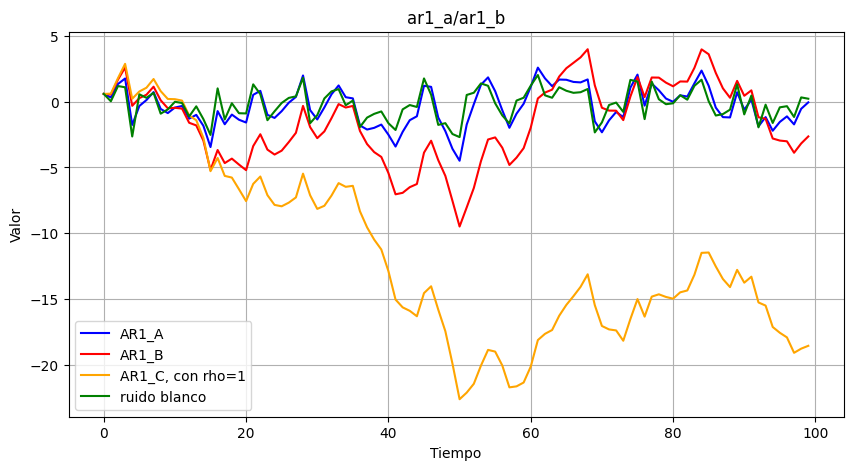

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(df['ar1_a'], color='blue',label='AR1_A')
plt.plot(df['ar1_b'], color='red',label='AR1_B')
plt.plot(df['ar1_c'],color='orange',label='AR1_C, con rho=1')
plt.plot(df['ruido_blanco'],color='green',label='ruido blanco')
plt.title('ar1_a/ar1_b')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.grid()
plt.legend()
plt.show()


### Ejercicio 11
#### Modificamos rho_1 por
- 0.95
- 0.97
- 0.99
- 1.01
- 1.05

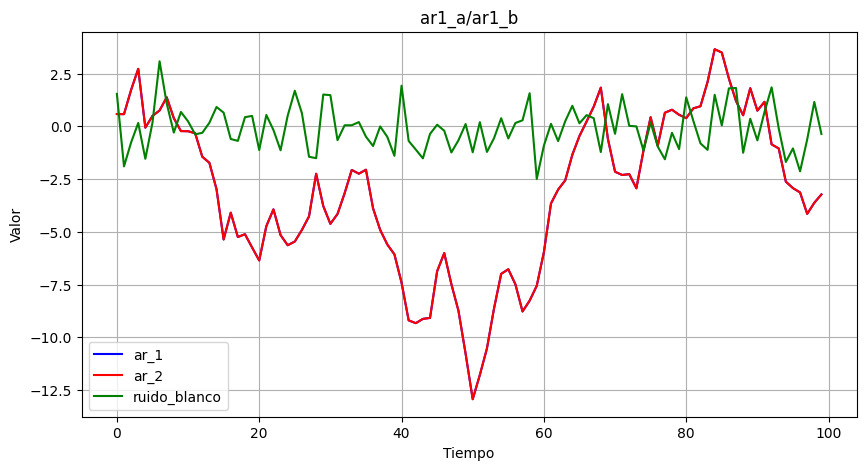

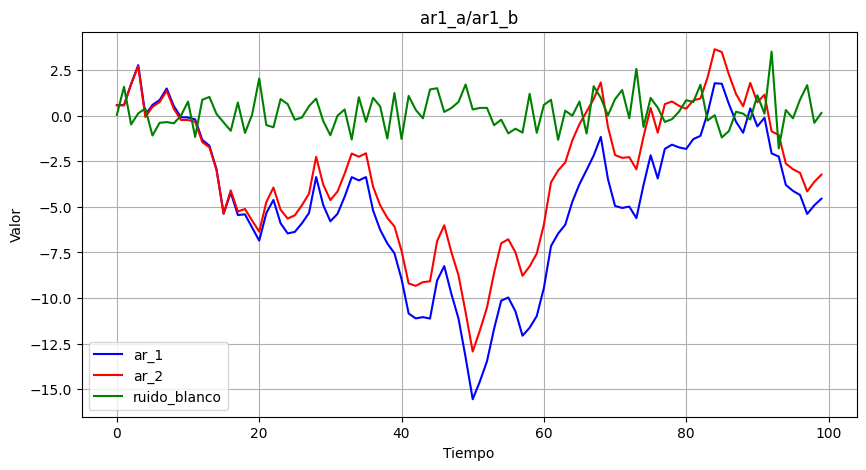

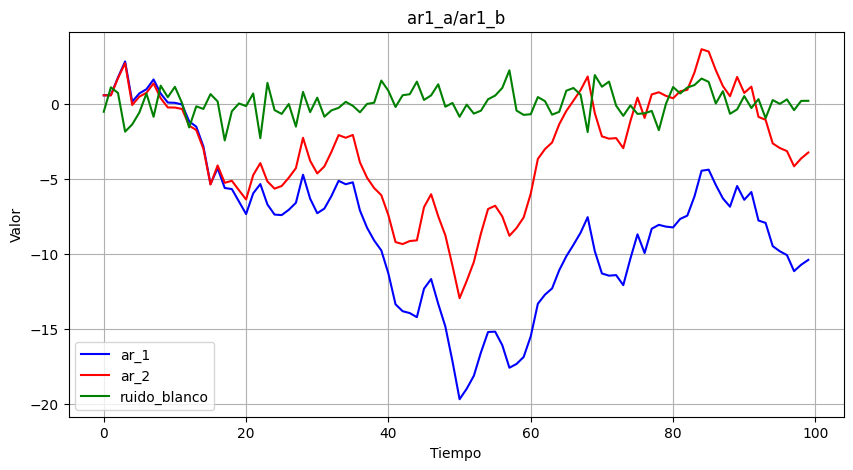

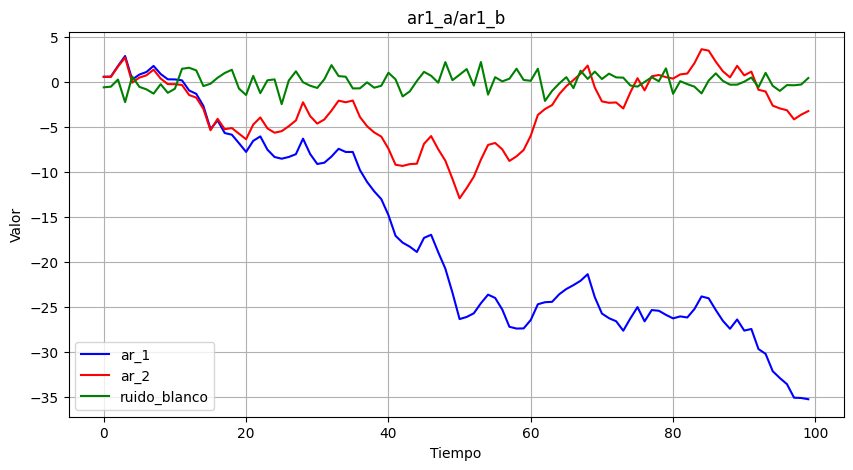

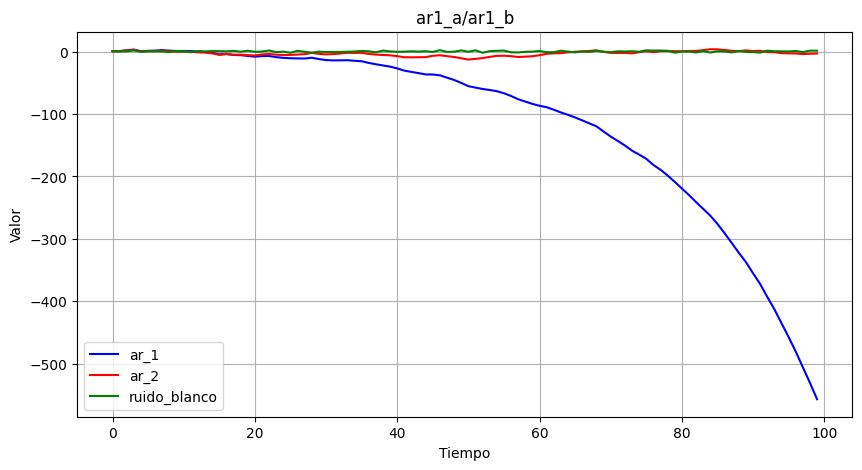

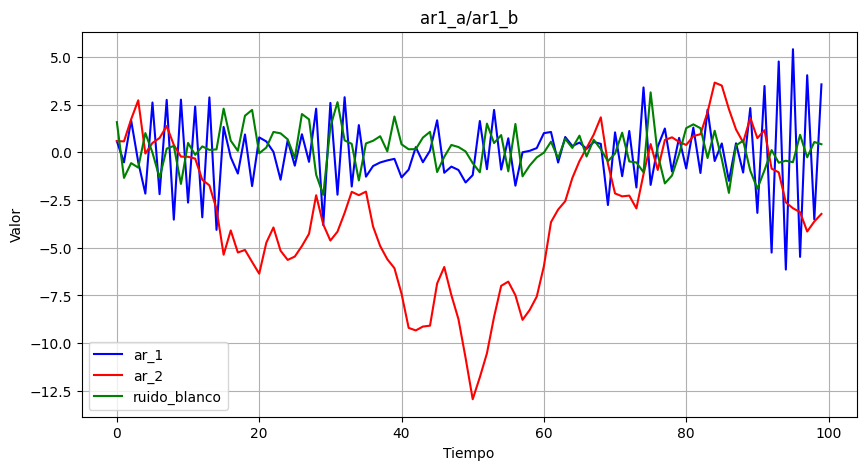

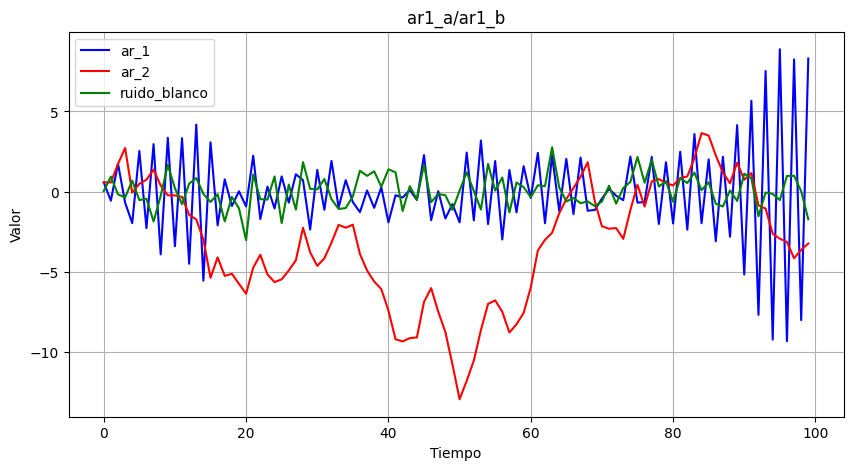

In [55]:
def plot_with_rho(rho_1):
    df_11=pd.DataFrame(generarRuidoBlancoPPf(100),columns=['ruido_blanco'])
   
    rho_2=0.95
    df_11['ar1_a']=lfilter([1],[1,-rho_1],df['ruido_blanco'])
    df_11['ar1_b']=lfilter([1],[1,-rho_2],df['ruido_blanco'])


    plt.figure(figsize=(10, 5))
    plt.plot(df_11['ar1_a'], color='blue',label='ar_1')
    plt.plot(df_11['ar1_b'], color='red',label="ar_2")
    plt.plot(df_11['ruido_blanco'],color='green',label="ruido_blanco")
    plt.title('ar1_a/ar1_b')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.grid()
    plt.legend()
    plt.show()


plot_with_rho(0.95)
plot_with_rho(0.97)
plot_with_rho(0.99)
plot_with_rho(1.01)
plot_with_rho(1.05)
plot_with_rho(-0.95)
plot_with_rho(-1.01)




### Pareciera que mientras mas cerca de 1 mas le cuesta volver a la media, lo que tiene sentido porque se vuelve No estacionaria

### Es el ruido blanco estacionario o no estacionario?
#### Rta: sí por definicion tiene E(et)=0 por lo tanto es estacionario

### Ruido blanco y random walk no son lo mismo, Random Walk es NO  estacionario

y=yt-1+et con et ruido blanco